In this Notebook:

1. Importing libraries, data, etc. 
2. Addressing PII security implications
3. Create a new column that lists regions of customers
4. Look at the difference in spending habits between regions
5. Create an exclusion flag for low-activity customers
6. Creating customer profiles based on certain characteristics
7. Plotting a bar chart to show profile distribution
8. Aggregate useage frequency and expenditure on profile level
9. Compare customer profiles with regions and departments
10. Extra visualisations for the final task

1. Importing Libraries, Data ..

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#creating path to Instacart folder
path = r"/Users/katerinapilota/Desktop/Desktop - Pilot's Mac mini/dataimmersion/python/ 02:03:21 Instacart Basket Analysis"

In [3]:
#importing data
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_combined_4'))

In [4]:
df_final.head()

,Unnamed: 0_x,Unnamed: 0.1,order_id,user_id,order_number,orders_days_of_the_week,time_of_order_24hr_time,days_since_prior_order,product_id,add_to_cart_order,...,First_Name,Last_Name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,_merge
0,0,0,2539329,1,1,2,8,0.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,1,1,2398795,1,2,3,7,15.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2,2,473747,1,3,3,12,21.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,3,3,2254736,1,4,4,7,29.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,4,4,431534,1,5,4,15,28.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
df_final.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'order_id', 'user_id', 'order_number',
       'orders_days_of_the_week', 'time_of_order_24hr_time',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'Unnamed: 0_y', 'product_name', 'aisle_id',
       'department_id', 'prices', 'True', 'price_range_loc', 'Busiest day',
       'Two busiest days', 'busiest_period_day', 'max_order', 'loyalty_flag',
       'mean_spend', 'spend_flag', 'median_ordering', 'freq_flag',
       'First_Name', 'Last_Name', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

2. Security implications: The columns 'First_name' and "Last_name' should be scrubbed in any analysis made public to comply with GDPR. 

In [68]:
df_final = df_final.drop(columns = ['First_Name', 'Last_Name'])

In [128]:
df_final.head()

,Unnamed: 0_x,Unnamed: 0.1,order_id,user_id,order_number,orders_days_of_the_week,time_of_order_24hr_time,days_since_prior_order,product_id,add_to_cart_order,...,STATE,Age,date_joined,n_dependants,fam_status,income,_merge,region,customer_activity,profile_loc
0,0,0,2539329,1,1,2,8,0.0,196,1,...,Alabama,31,2/17/2019,3,married,40423,both,South,regular_activity,NaN
1,1,1,2398795,1,2,3,7,15.0,196,1,...,Alabama,31,2/17/2019,3,married,40423,both,South,regular_activity,NaN
2,2,2,473747,1,3,3,12,21.0,196,1,...,Alabama,31,2/17/2019,3,married,40423,both,South,regular_activity,NaN
3,3,3,2254736,1,4,4,7,29.0,196,1,...,Alabama,31,2/17/2019,3,married,40423,both,South,regular_activity,NaN
4,4,4,431534,1,5,4,15,28.0,196,1,...,Alabama,31,2/17/2019,3,married,40423,both,South,regular_activity,NaN


3. Create a new column that catergorises states into regions

In [69]:
#checking contents of STATE column
df_final['STATE'].value_counts()

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [70]:
#creating the for-loop
result = []

for value in df_final['STATE']:
    if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
        result.append('Northeast')
    elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
        result.append('Midwest')
    elif value == 'Idaho' or value == 'Montana' or value == 'Wyoming' or value == 'Nevada' or value == 'Utah' or value == 'Colorado' or value == 'Arizona' or value == 'New Mexico' or value == 'Alaska' or value == 'Washington' or value == 'Oregon' or value == 'California' or value == 'Hawaii':
        result.append('West')
    else:
        result.append('South')

In [71]:
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [72]:
#creating the new column for the regions
df_final['region'] = result

In [73]:
#counting the frequency of the region column
df_final['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

4. Look at the difference in spending between region and sales

In [74]:
#check the count of freq_flag
df_final['freq_flag'].value_counts()

Frequent customer        22796659
Regular customer          6921472
Non-frequent customer     2686728
Name: freq_flag, dtype: int64

4. Create a line chart crossing the spending flag with regions

In [75]:
#split the data randomly into two groups: 70/30 split
#first, set the seed, a random reproducible pattern
np.random.seed(4)

In [76]:
#create a new list called dev that will store than boolean values
dev = np.random.rand(len(df_final)) <= 0.7

In [77]:
#store 70% of the sample in the dataframe big
big = df_final[dev]

In [78]:
#store 30% of the sample in the dataframe small
small = df_final[~dev]

In [79]:
df_1 = small[['spend_flag', 'region']]

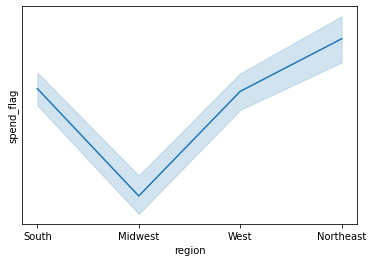

In [80]:
line = sns.lineplot(data = df_1, x = 'region', y = 'spend_flag')

In [81]:
#export line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_region_spend.png'))

3. Create an exclusion flag for low-activity customers

In [82]:
#checking the distribution of order numbers
df_final['spend_flag'].value_counts()

Low spender     31770742
High spender      634117
Name: spend_flag, dtype: int64

In [83]:
#checking the distribution of freq_flag
df_final['freq_flag'].value_counts()

Frequent customer        22796659
Regular customer          6921472
Non-frequent customer     2686728
Name: freq_flag, dtype: int64

In [84]:
#use the 'max_order' column to store an exclsuion flag for customers with less than 5 orders
#using loc()
df_final.loc[df_final['max_order'] < 5, 'customer_activity'] = 'low_activity'

In [85]:
df_final.loc[df_final['max_order'] >= 5, 'customer_activity'] = 'regular_activity'

In [86]:
#create a new df that contains just low activity customers
df_low_activity = df_final[df_final['customer_activity'] == 'low_activity']

In [87]:
df_low_activity

,Unnamed: 0_x,Unnamed: 0.1,order_id,user_id,order_number,orders_days_of_the_week,time_of_order_24hr_time,days_since_prior_order,product_id,add_to_cart_order,...,STATE,Age,date_joined,n_dependants,fam_status,income,_merge,region,customer_activity,profile_loc
1510,1744,1744,520620,120,1,3,11,0.0,196,2,...,Kentucky,54,3/2/2017,2,married,99219,both,South,low_activity,NaN
1511,1746,1746,3273029,120,3,2,8,19.0,196,2,...,Kentucky,54,3/2/2017,2,married,99219,both,South,low_activity,NaN
1512,1744,1744,520620,120,1,3,11,0.0,46149,1,...,Kentucky,54,3/2/2017,2,married,99219,both,South,low_activity,NaN
1513,1746,1746,3273029,120,3,2,8,19.0,46149,1,...,Kentucky,54,3/2/2017,2,married,99219,both,South,low_activity,NaN
1514,1744,1744,520620,120,1,3,11,0.0,26348,3,...,Kentucky,54,3/2/2017,2,married,99219,both,South,low_activity,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404828,2766260,2766260,1947537,166751,3,4,7,0.0,49001,1,...,Oregon,38,8/17/2018,1,married,41766,both,West,low_activity,NaN
32404855,1101646,1101646,484769,66343,1,6,11,0.0,47210,1,...,Tennessee,22,9/12/2017,3,married,46151,both,South,low_activity,NaN
32404856,1101647,1101647,1561557,66343,2,1,11,30.0,47210,1,...,Tennessee,22,9/12/2017,3,married,46151,both,South,low_activity,NaN
32404857,1101648,1101648,276317,66343,3,6,15,19.0,47210,1,...,Tennessee,22,9/12/2017,3,married,46151,both,South,low_activity,NaN


In [88]:
#testing the length of low_activity df
len(df_low_activity)

1440295

In [89]:
len(df_final)

32404859

In [90]:
#exporting the low_activity df

6. Creating customer profiles for the marketing department

In [91]:
#investigating the stats of different columns for inclusion in the profiling variables
df_final['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [92]:
df_final['income'].max()

593901

In [93]:
df_final['income'].min()

25903

In [94]:
df_final['income'].mean()

99437.73329450376

In [95]:
df_final['income'].quantile([0.25, 0.75])

0.25     67004.0
0.75    127912.0
Name: income, dtype: float64

In [96]:
df_final['fam_status'].value_counts(dropna = False)

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: fam_status, dtype: int64

In [97]:
df_final['Age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [98]:
df_final['Age'].min()

18

In [99]:
df_final['Age'].max()

81

In [100]:
df_final['Age'].mean()

49.465269853511785

In [101]:
df_final['n_dependants'].value_counts(dropna = False)

3    8135109
0    8097503
2    8091143
1    8081104
Name: n_dependants, dtype: int64

The customer profiles are:
    a. Student : low income, 0 dependants, age < 25, living w parents + siblings
    b. Young professional : middle to high income, 0 dependants, age < 35, single
    c. Family/ies (1-3 children): middle to high income, 1-3 dependants, age > 30, married
    d. Empty-Nester: middle to high income, 0 dependants, age > 50 , married or widowed or divorced
    e. Young couple: middle to high income, 0 dependants, < 40, married

In [102]:
#create customer profiles flag using loc()
#STUDENT
df_final.loc[(df_final['income'] < 67004.0) & (df_final['n_dependants'] == 0) & (df_final['Age'] < 25) & (df_final['fam_status'] == 'living with parents and siblings' ), 'profile_loc'] = 'Student'

In [103]:
#YOUNG PROFESSIONAL
df_final.loc[(df_final['income'] > 99437.0) & (df_final['n_dependants'] == 0) & (df_final['Age'] < 35) & (df_final['fam_status'] == 'single'), 'profile_loc'] = 'Young professional'

In [104]:
#LARGE FAMILY
df_final.loc[(df_final['income'] > 99437.0) & (df_final['n_dependants'] == 3) & (df_final['Age'] > 35) & (df_final['fam_status'] == 'married'), 'profile_loc'] = 'Family_3child'

In [105]:
#MED FAMILY
df_final.loc[(df_final['income'] > 99437.0) & (df_final['n_dependants'] == 2) & (df_final['Age'] > 35) & (df_final['fam_status'] == 'married'), 'profile_loc'] = 'Family_2child'

In [106]:
#SMALL FAMILY
df_final.loc[(df_final['income'] > 99437.0) & (df_final['n_dependants'] == 1) & (df_final['Age'] > 35) & (df_final['fam_status'] == 'married'), 'profile_loc'] = 'Family_1child'

In [107]:
#Empty-Nester
df_final.loc[(df_final['income'] > 99437.0) & (df_final['n_dependants'] == 0) & (df_final['Age'] > 50) & (df_final['fam_status'] == 'divorced/widowed'), 'profile_loc'] = 'Empty Nester'

In [108]:
#YOUNG COUPLE
df_final.loc[(df_final['income'] > 99437.0) & (df_final['n_dependants'] == 0) & (df_final['Age'] < 50) & (df_final['fam_status'] == 'married'), 'profile_loc'] = 'Young couple'

In [109]:
df_final['profile_loc'].value_counts(dropna = False)

NaN                   19360858
Family_3child          3694760
Family_2child          3659786
Family_1child          3654369
Empty Nester           1944594
Young professional       90492
Name: profile_loc, dtype: int64

In [110]:
#making pet owner flag for marketing department




7. Plotting bar chart to show profile distribution

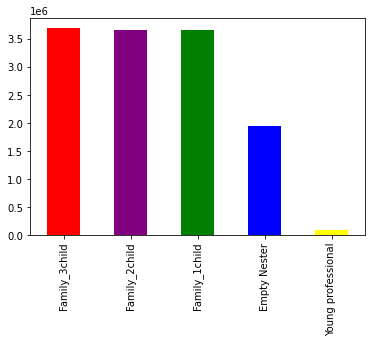

In [111]:
#making a bar chart from 'profile_loc' column
Bar_3 = df_final['profile_loc'].value_counts().plot.bar(color = ['red', 'purple', 'green', 'blue', 'yellow'])

In [112]:
#export bar
Bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'profile_distribution.png'))

8. Aggregate useage frequency and expenditure on profile level

In [113]:
#finding the max (mean_spend) for each customer profile
df_final.groupby('profile_loc').agg({'mean_spend': ['max']})

,mean_spend
,max
profile_loc,
Empty Nester,14042.512281
Family_1child,6983.593023
Family_2child,11772.100000
Family_3child,7414.485185
Young professional,8794.882427


In [114]:
#finding the min (mean_spend) for each customer profile
df_final.groupby('profile_loc').agg({'mean_spend': ['min']})

,mean_spend
,min
profile_loc,
Empty Nester,7.000000
Family_1child,7.000000
Family_2child,7.000000
Family_3child,7.000402
Young professional,7.001282


In [115]:
#finding the mean (mean_spend) for each customer profile
df_final.groupby('profile_loc').agg({'mean_spend': ['mean']})

,mean_spend
,mean
profile_loc,
Empty Nester,12.967594
Family_1child,14.069107
Family_2child,14.876792
Family_3child,13.459237
Young professional,107.387433


In [116]:
#finding the max (median_ordering) for each customer profile
df_final.groupby('profile_loc').agg({'median_ordering': ['max']})

,median_ordering
,max
profile_loc,
Empty Nester,30.0
Family_1child,30.0
Family_2child,30.0
Family_3child,30.0
Young professional,30.0


In [117]:
#finding the mean (median_ordering) for each customer profile
df_final.groupby('profile_loc').agg({'median_ordering': ['mean']})

,median_ordering
,mean
profile_loc,
Empty Nester,9.452886
Family_1child,9.567500
Family_2child,9.507426
Family_3child,9.518440
Young professional,9.087234


In [118]:
#finding the min (median_ordering) for each customer profile
df_final.groupby('profile_loc').agg({'median_ordering': ['min']})

,median_ordering
,min
profile_loc,
Empty Nester,0.0
Family_1child,0.0
Family_2child,0.0
Family_3child,0.0
Young professional,0.0


9. Compare customer profiles with regions and departments

In [119]:
df_2 = df_final[['region', 'profile_loc']]

In [120]:
df_2.dropna()

,region,profile_loc
131,South,Family_1child
132,South,Family_1child
133,South,Family_1child
134,South,Family_1child
135,South,Family_1child
...,...,...
32404808,South,Empty Nester
32404809,South,Empty Nester
32404816,Midwest,Family_1child
32404817,Midwest,Family_1child


9. Craete visuals to compare profiles + regions with profiles + departments

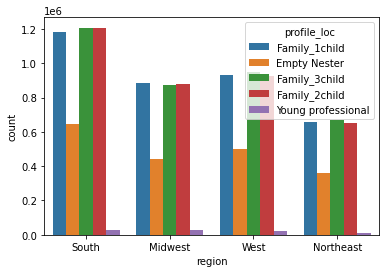

In [121]:
#create countplot for categorical variables w seaborn
#plot relationship between region and profile
cp_region_profile = sns.countplot (x = 'region', hue = 'profile_loc', data = df_2)

In [122]:
#export cp_region_profile
cp_region_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'cp_region_profile.png'))

In [123]:
#plot relationship between department id and profiles
#create new df for countplot
df_3 = df_final[['department_id', 'profile_loc']]

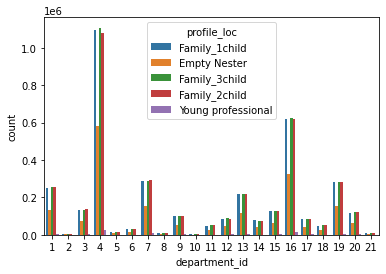

In [124]:
#create the chart
cp_department_profile = sns.countplot (x = 'department_id', hue = 'profile_loc', data = df_3)

In [125]:
#export the chart
cp_department_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'cp_department_profile.png'))

In [126]:
#checking some extra columns
df_final[['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0_y']]

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0_y
0,0,0,195
1,1,1,195
2,2,2,195
3,3,3,195
4,4,4,195
...,...,...,...
32404854,1768145,1768145,19676
32404855,1101646,1101646,47214
32404856,1101647,1101647,47214
32404857,1101648,1101648,47214


In [127]:
df_final.shape

(32404859, 38)

10. Extra visualisations for the task 

In [132]:
#make a frequency chart for departments
df_final['department_id'].value_counts()

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

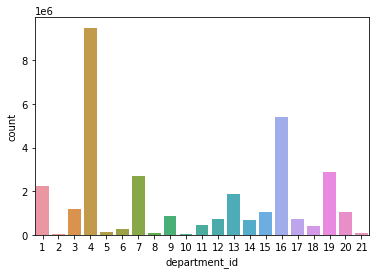

In [138]:
department_count = sns.countplot (x = 'department_id', data = df_final)

In [139]:
#export chart 
department_count.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'department_count.png'))